In [7]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
with open('dentate_projs', 'rb') as dprojs:
    d = pickle.load(dprojs)
    df = pd.DataFrame(d, index=[0])

In [19]:
df = df.transpose()

In [16]:
pd.DataFrame([1,2,3])

,0
0,1
1,2
2,3


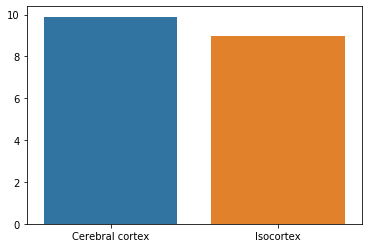

In [34]:
sns.barplot(data=df.transpose())

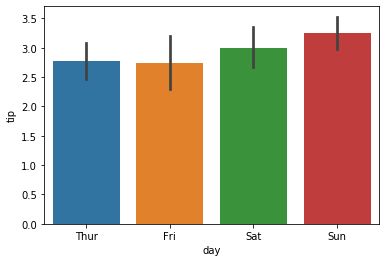

In [33]:
sns.barplot(data=tips, x='day', y='tip')

In [36]:
df.transpose()

,Cerebral cortex,Isocortex
0,9.899472,8.958531


In [2]:
d_projs = pd.read_pickle('dentate_projs')
i_projs = pd.read_pickle('interposed_projs')

In [3]:
df = pd.concat((d_projs, i_projs))

In [4]:
df

,Source area,Target area,Projection strength
0,Dentate nucleus,Somatomotor areas,3.373510
1,Dentate nucleus,Somatosensory areas,1.070967
2,Dentate nucleus,Gustatory areas,0.169129
3,Dentate nucleus,Visceral area,0.210715
4,Dentate nucleus,Auditory areas,0.013654
5,Dentate nucleus,Visual areas,0.082410
6,Dentate nucleus,Anterior cingulate area,0.450073
7,Dentate nucleus,Orbital area,1.238913
0,Interposed nucleus,Somatomotor areas,0.898580
1,Interposed nucleus,Somatosensory areas,0.400107


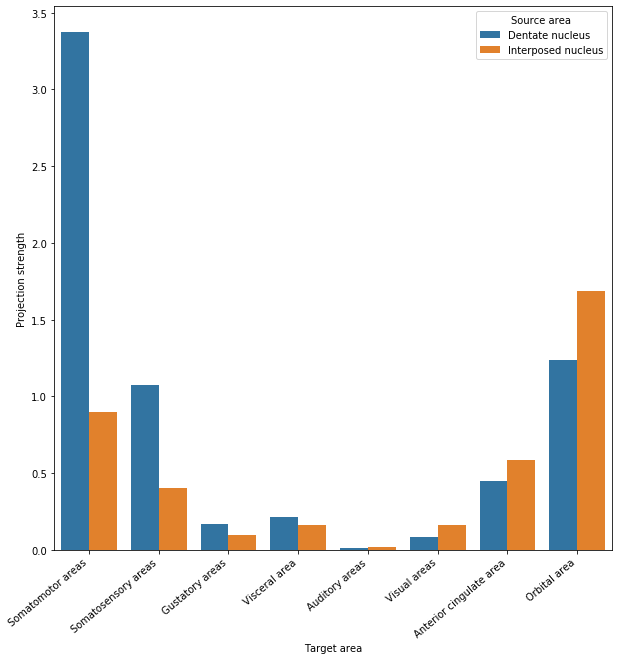

In [8]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=df, x='Target area', y='Projection strength', hue='Source area')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_figure().savefig('prelim_plot.pdf')

In [47]:
1 in d.values()

True

In [60]:
pd.DataFrame({'hi': [0,1], 'word': ['b','bye']})

,hi,word
0,0,b
1,1,bye
